In [1]:
import numpy as np
from Q_maze import Q_maze, plot_steps_per_episode_comp

In [2]:
# Generacion de un ejemplo de matriz de recompensas (ver excel)
rewards = np.ones((9,9))*-100
rewards[1,0:6] = - 1
rewards[2,3] = -1
rewards[3,1:4] = -1
rewards[4,1] = -1
rewards[5,1:8] = -1
rewards[6,1] = -1
rewards[7,0:2] = -1
rewards[7,3:6] = -1
rewards[3:8,5] = -1
rewards[1:8,7] = -1
rewards[2,8] = 500
print(rewards)

estado_inicio = [1, 0] # Cambiar estos valores si se quiere evaluar otro estado en el que el agente comience su recorrido.

n_iter = 400
alpha = 0.9
gamma = 0.9
epsilon = 0.1

#Laberinto con paredes de fuego. Notar que se esta utilizando el metodo UCB1, y no e-greedy. Cambiar el parametro a method = 'e-greedy' si lo desea.
exp3 = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', game='fire-walls') 
exp3.train()

en_greedy = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'en-greedy', game='fire-walls', c = 1, d = 1) 
en_greedy.train()

softmax_exp = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', game='fire-walls', temperature = 1) 
softmax_exp.train()

ucb1 = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'UCB1', game='fire-walls') 
ucb1.train()

e_greedy = Q_maze(rewards, episodes = n_iter, discount_rate = gamma, alpha = alpha, epsilon = epsilon, method = 'e-greedy', game='fire-walls')
e_greedy.train()

[[-100. -100. -100. -100. -100. -100. -100. -100. -100.]
 [  -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
 [-100. -100. -100.   -1. -100. -100. -100.   -1.  500.]
 [-100.   -1.   -1.   -1. -100.   -1. -100.   -1. -100.]
 [-100.   -1. -100. -100. -100.   -1. -100.   -1. -100.]
 [-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
 [-100.   -1. -100. -100. -100.   -1. -100.   -1. -100.]
 [  -1.   -1. -100.   -1.   -1.   -1. -100.   -1. -100.]
 [-100. -100. -100. -100. -100. -100. -100. -100. -100.]]


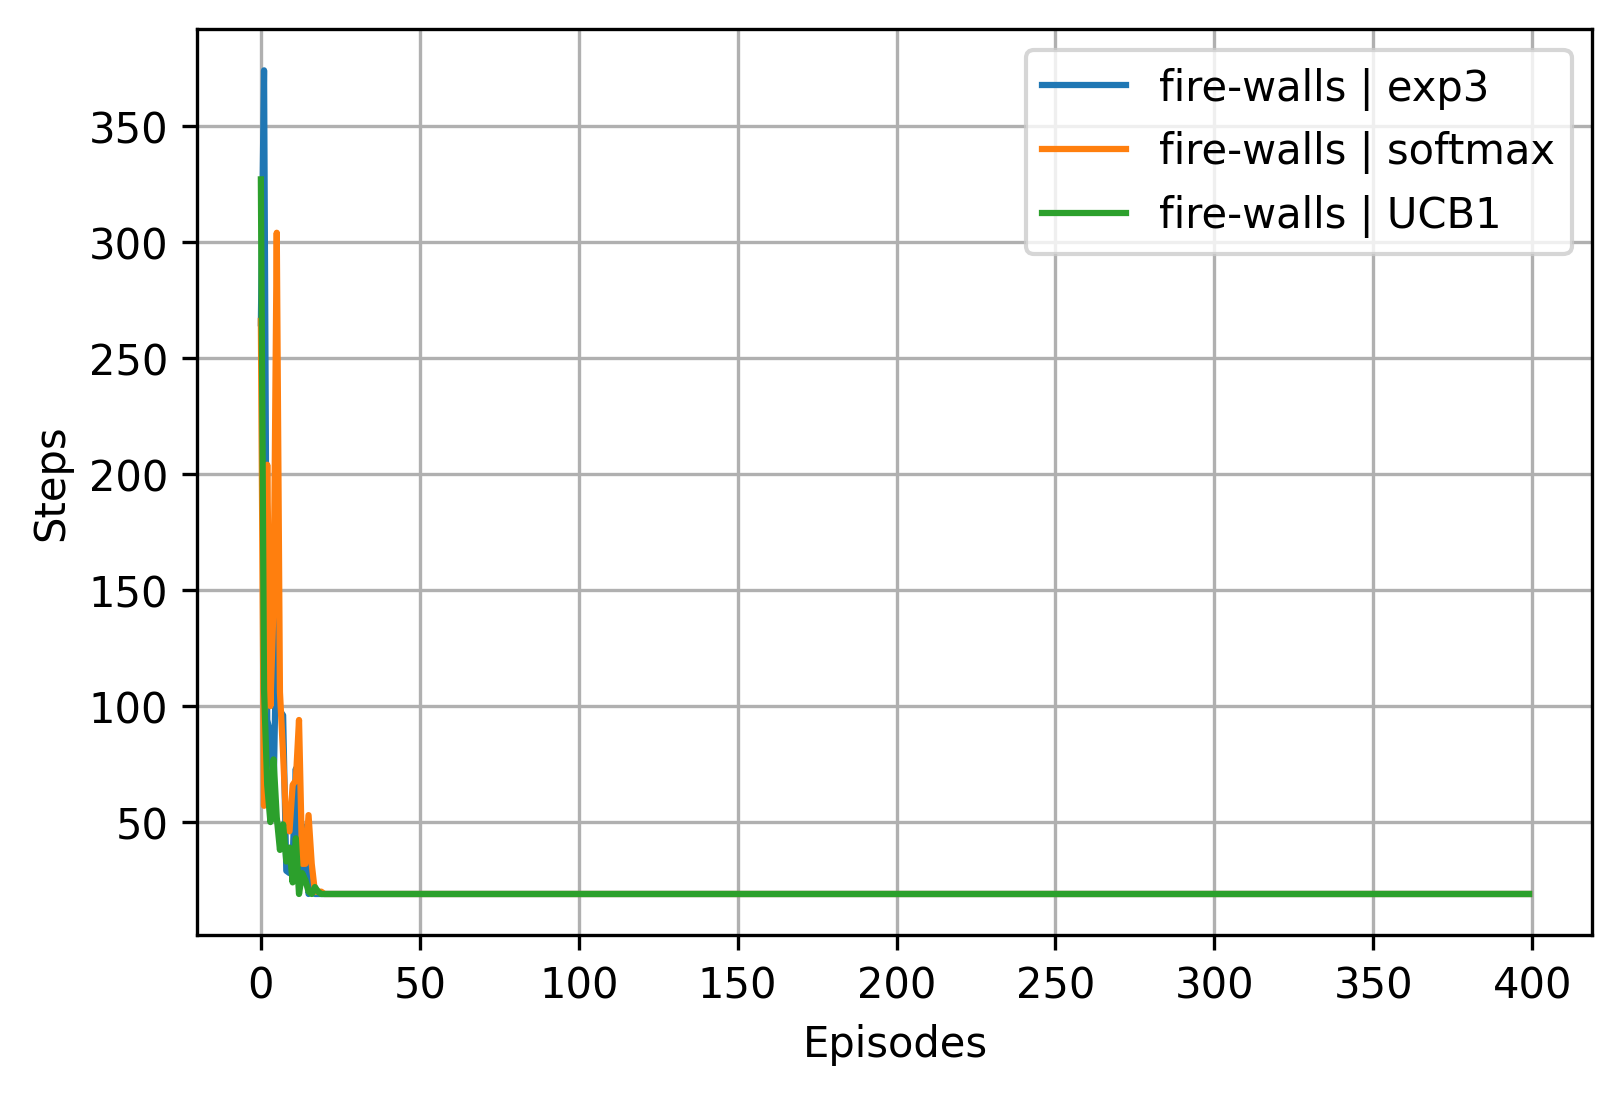

In [3]:
plot_steps_per_episode_comp([exp3, softmax_exp, ucb1], 300)

In [1]:
import numpy as np
from Q_maze import Q_maze, plot_steps_per_episode_comp, generate_maze, plot_maze

In [5]:
# Ejemplo de uso
maze_size = 25
start_point = (1, 0)
end_point = (maze_size - 2, maze_size - 1)

maze = generate_maze(maze_size, maze_size, start_point, end_point)

In [6]:
np.where(maze==500)

(array([23], dtype=int64), array([24], dtype=int64))

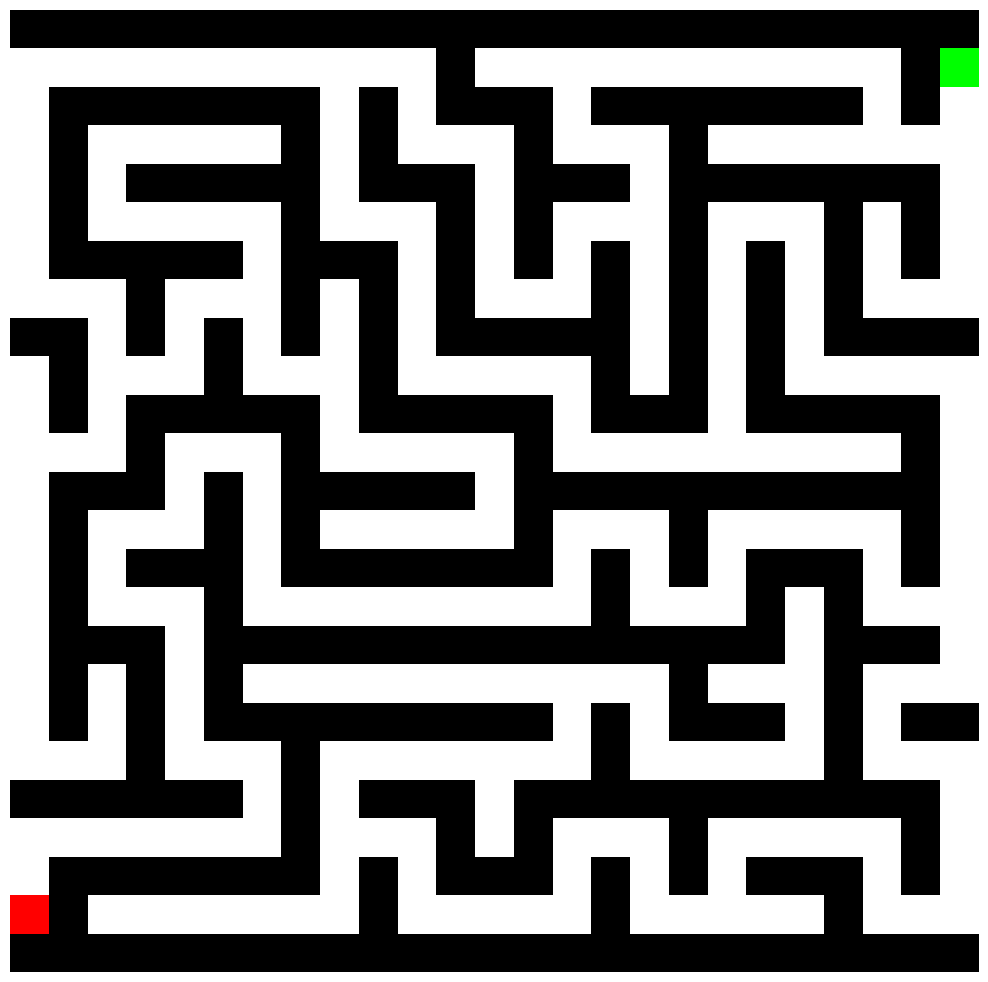

In [7]:
# Imprimir el laberinto generado
plot_maze(maze, start_point, end_point)

In [53]:
np.array([[1, 2, 3, 4, 5], [1, 2, 3, 4, 0]])[1]

array([1, 2, 3, 4, 0])

## Evaluación de modelos

In [21]:
n_iter = 500
alpha = 0.9
gamma = 0.9
epsilon = 0.1
maze = np.matrix(maze)

In [22]:
exp3_t2 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2.train()

In [23]:
exp3_t2.steps

array([3463., 4706.,  376.,  351.,  588.,  370.,  315.,  562.,  476.,
        278.,  408.,  490.,  533.,  294.,  404.,  267.,  331.,  272.,
        424.,  290.,  270.,  200.,  248.,  234.,  225.,  367.,  221.,
        230.,  214.,  366.,  271.,  266.,  426.,  187.,  246.,  299.,
        425.,  178.,  199.,  186.,  183.,  163.,  280.,  190.,  160.,
        173.,  283.,  146.,  160.,  171.,  139.,  152.,  180.,  144.,
        144.,  163.,  144.,  248.,  142.,  145.,  231.,  148.,  140.,
        144.,  129.,  244.,  149.,  128.,  141.,  148.,  137.,  134.,
        268.,  128.,  134.,  144.,  123.,  134.,  125.,  128.,  133.,
        133.,  121.,  128.,  123.,  125.,  129.,  130.,  122.,  121.,
        115.,  132.,  120.,  123.,  118.,  122.,  122.,  116.,  118.,
        113.,  115.,  118.,  113.,  116.,  112.,  118.,  114.,  110.,
        115.,  110.,  113.,  111.,  110.,  110.,  110.,  110.,  110.,
        110.,  110.,  110.,  110.,  110.,  110.,  110.,  110.,  110.,
        110.,  110.,

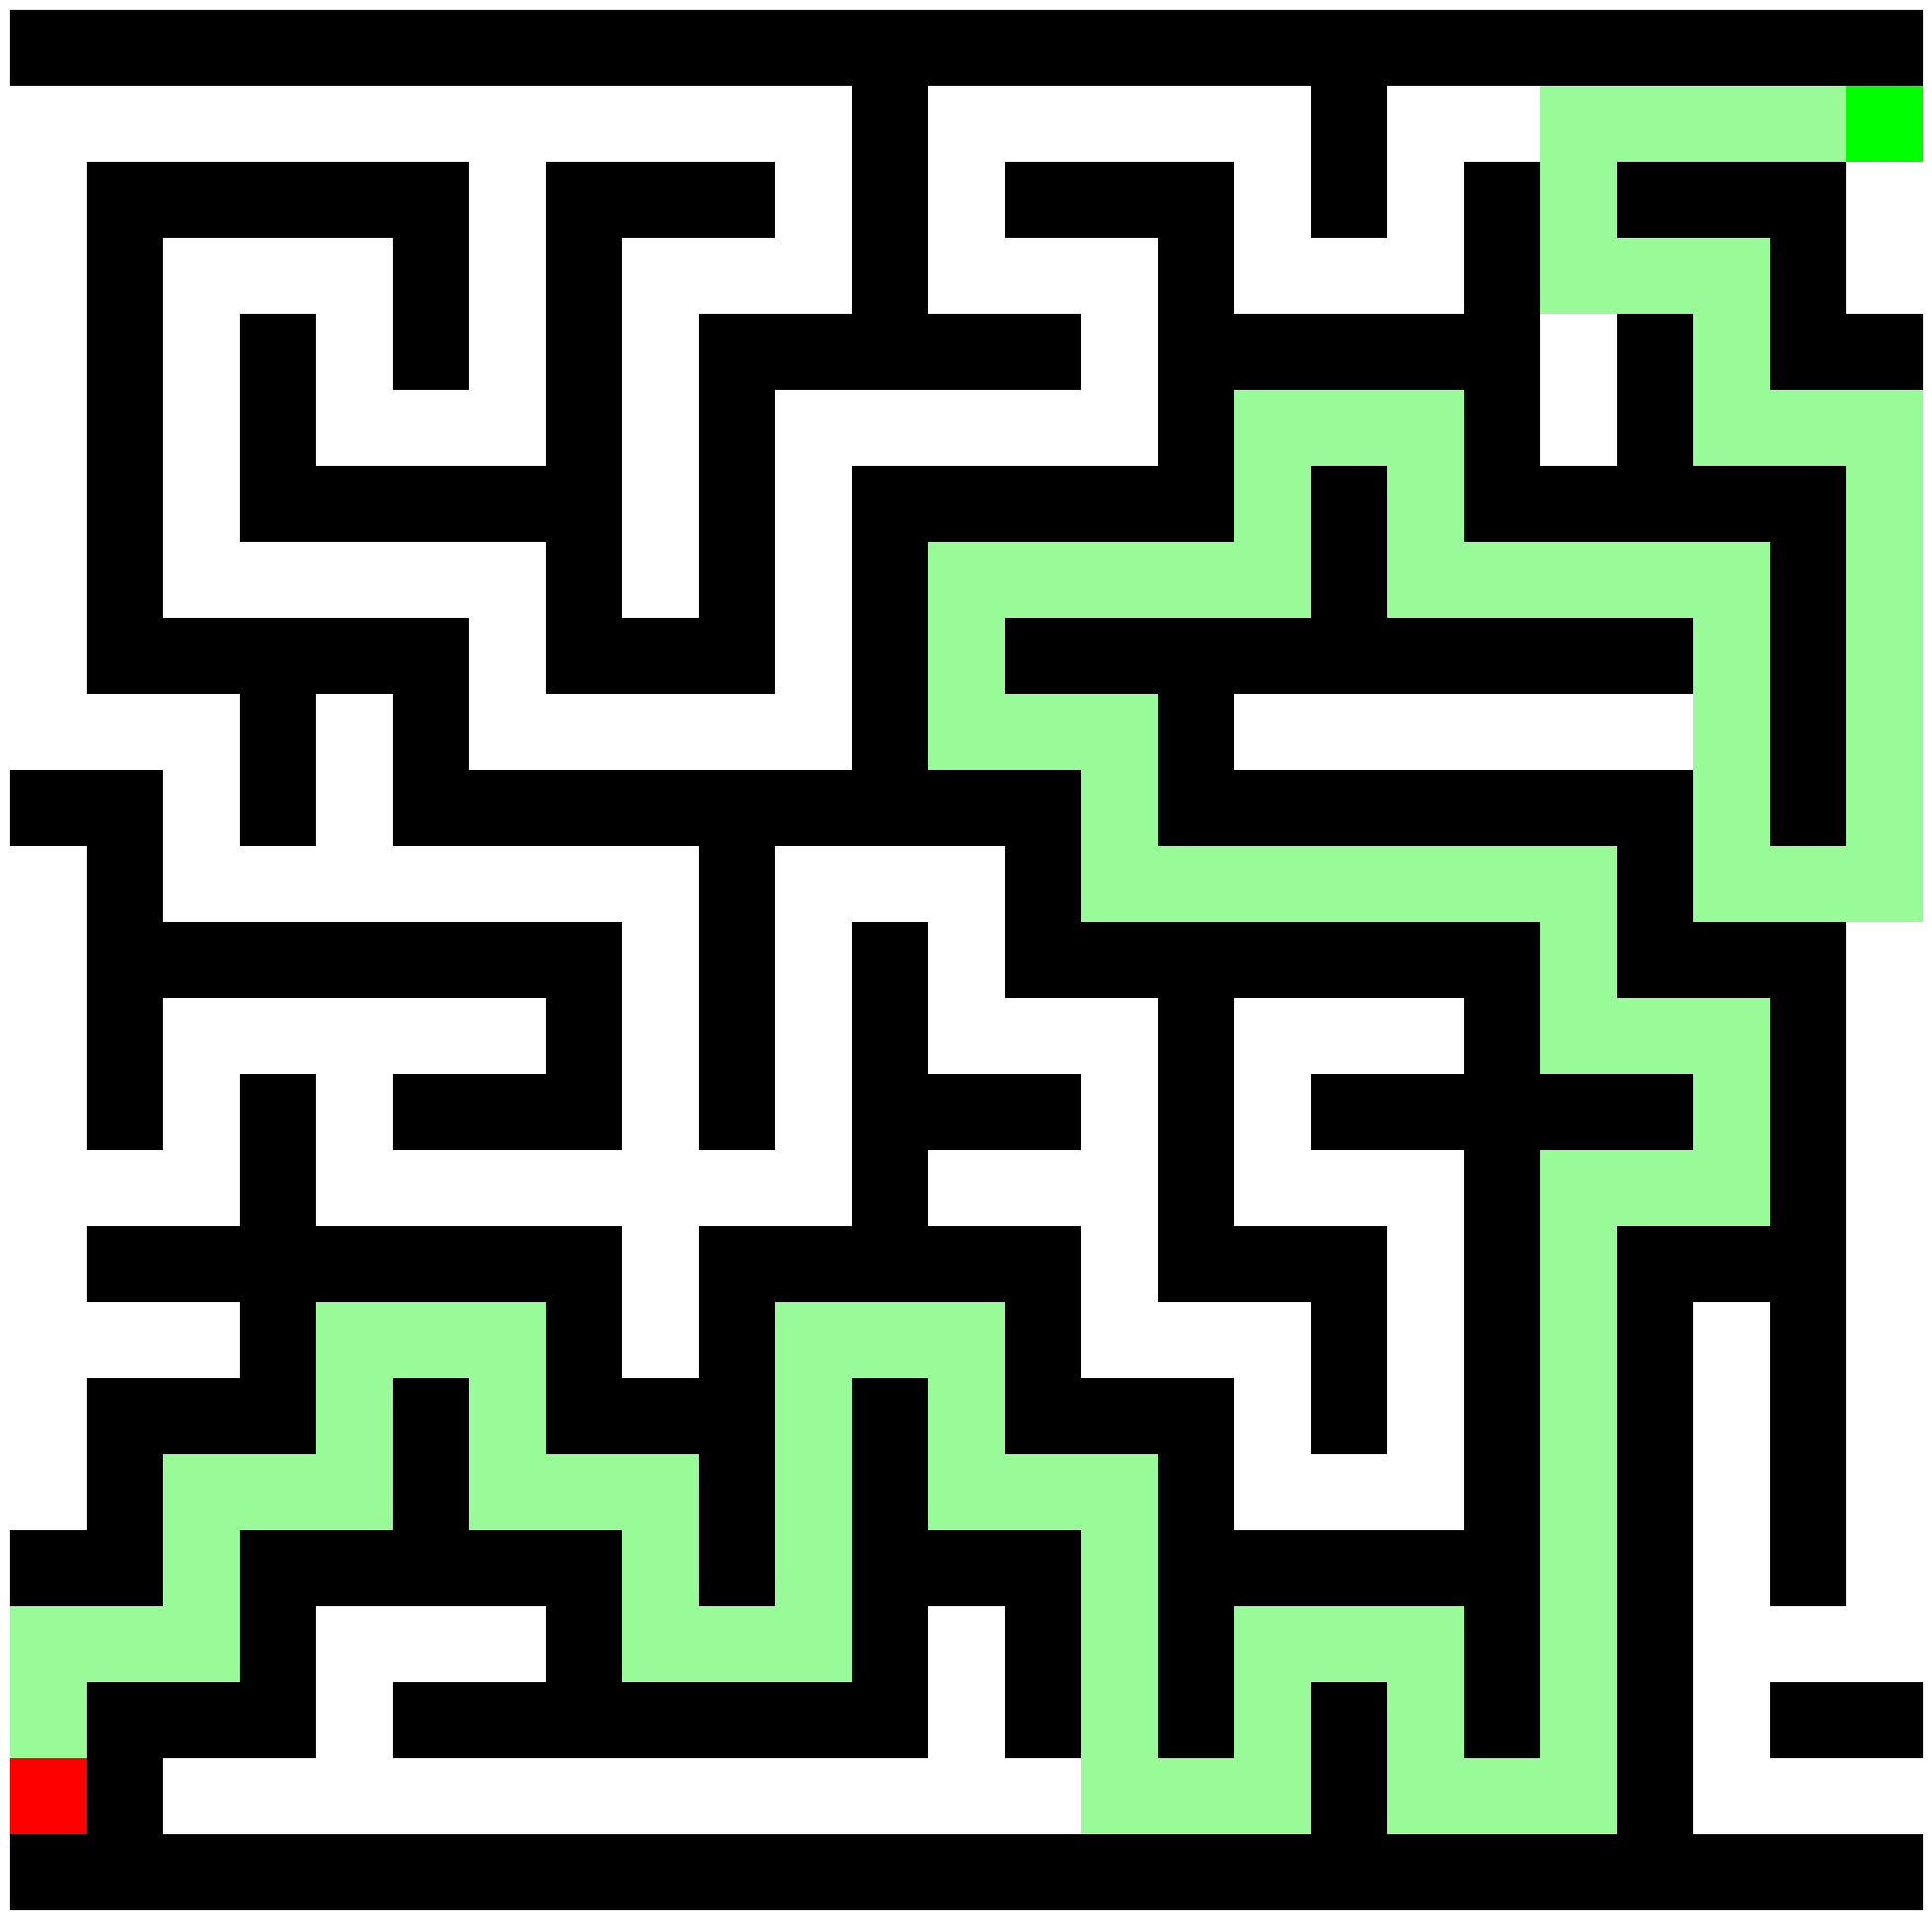

In [24]:
path = exp3_t2.best_path(start_point)
plot_maze(maze, start_point, end_point, path = path)

In [17]:
exp3_sqrt_t = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='\sqrt{t}', game='fire-walls') 
exp3_sqrt_t.train()

In [12]:
ucb1 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'UCB1', game='fire-walls') 
ucb1.train()

KeyboardInterrupt: 

In [19]:
#Laberinto con paredes de fuego.
# exp3 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', game='fire-walls') 
# exp3.train()


exp3_t2_T = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2/T', game='fire-walls') 
exp3_t2_T.train()

# exp3_ln_t = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='\log t', game='fire-walls') 
# exp3_ln_t.train()

# exp3_sqrt_t = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='\sqrt{t}', game='fire-walls') 
# exp3_sqrt_t.train()

# softmax_exp_1 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', temperature = 0.1, game='fire-walls') 
# softmax_exp_1.train()

# softmax_exp_2 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', temperature = 2, game='fire-walls') 
# softmax_exp_2.train()

# softmax_exp_3 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', temperature = 3, game='fire-walls') 
# softmax_exp_3.train()

# softmax_exp_4 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'softmax', temperature = 4, game='fire-walls') 
# softmax_exp_4.train()

# ucb1 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'UCB1', game='fire-walls') 
# ucb1.train()

# plot_steps_per_episode_comp([exp3, softmax_exp_1, softmax_exp_2,softmax_exp_3, softmax_exp_4, ucb1], dpi=100)
# plot_steps_per_episode_comp([exp3,exp3_t, exp3_t2_T, ucb1], dpi=100)
# plot_steps_per_episode_comp([exp3,exp3_t, exp3_ln_t, exp3_sqrt_t, exp3_t2_T, ucb1], dpi=100)


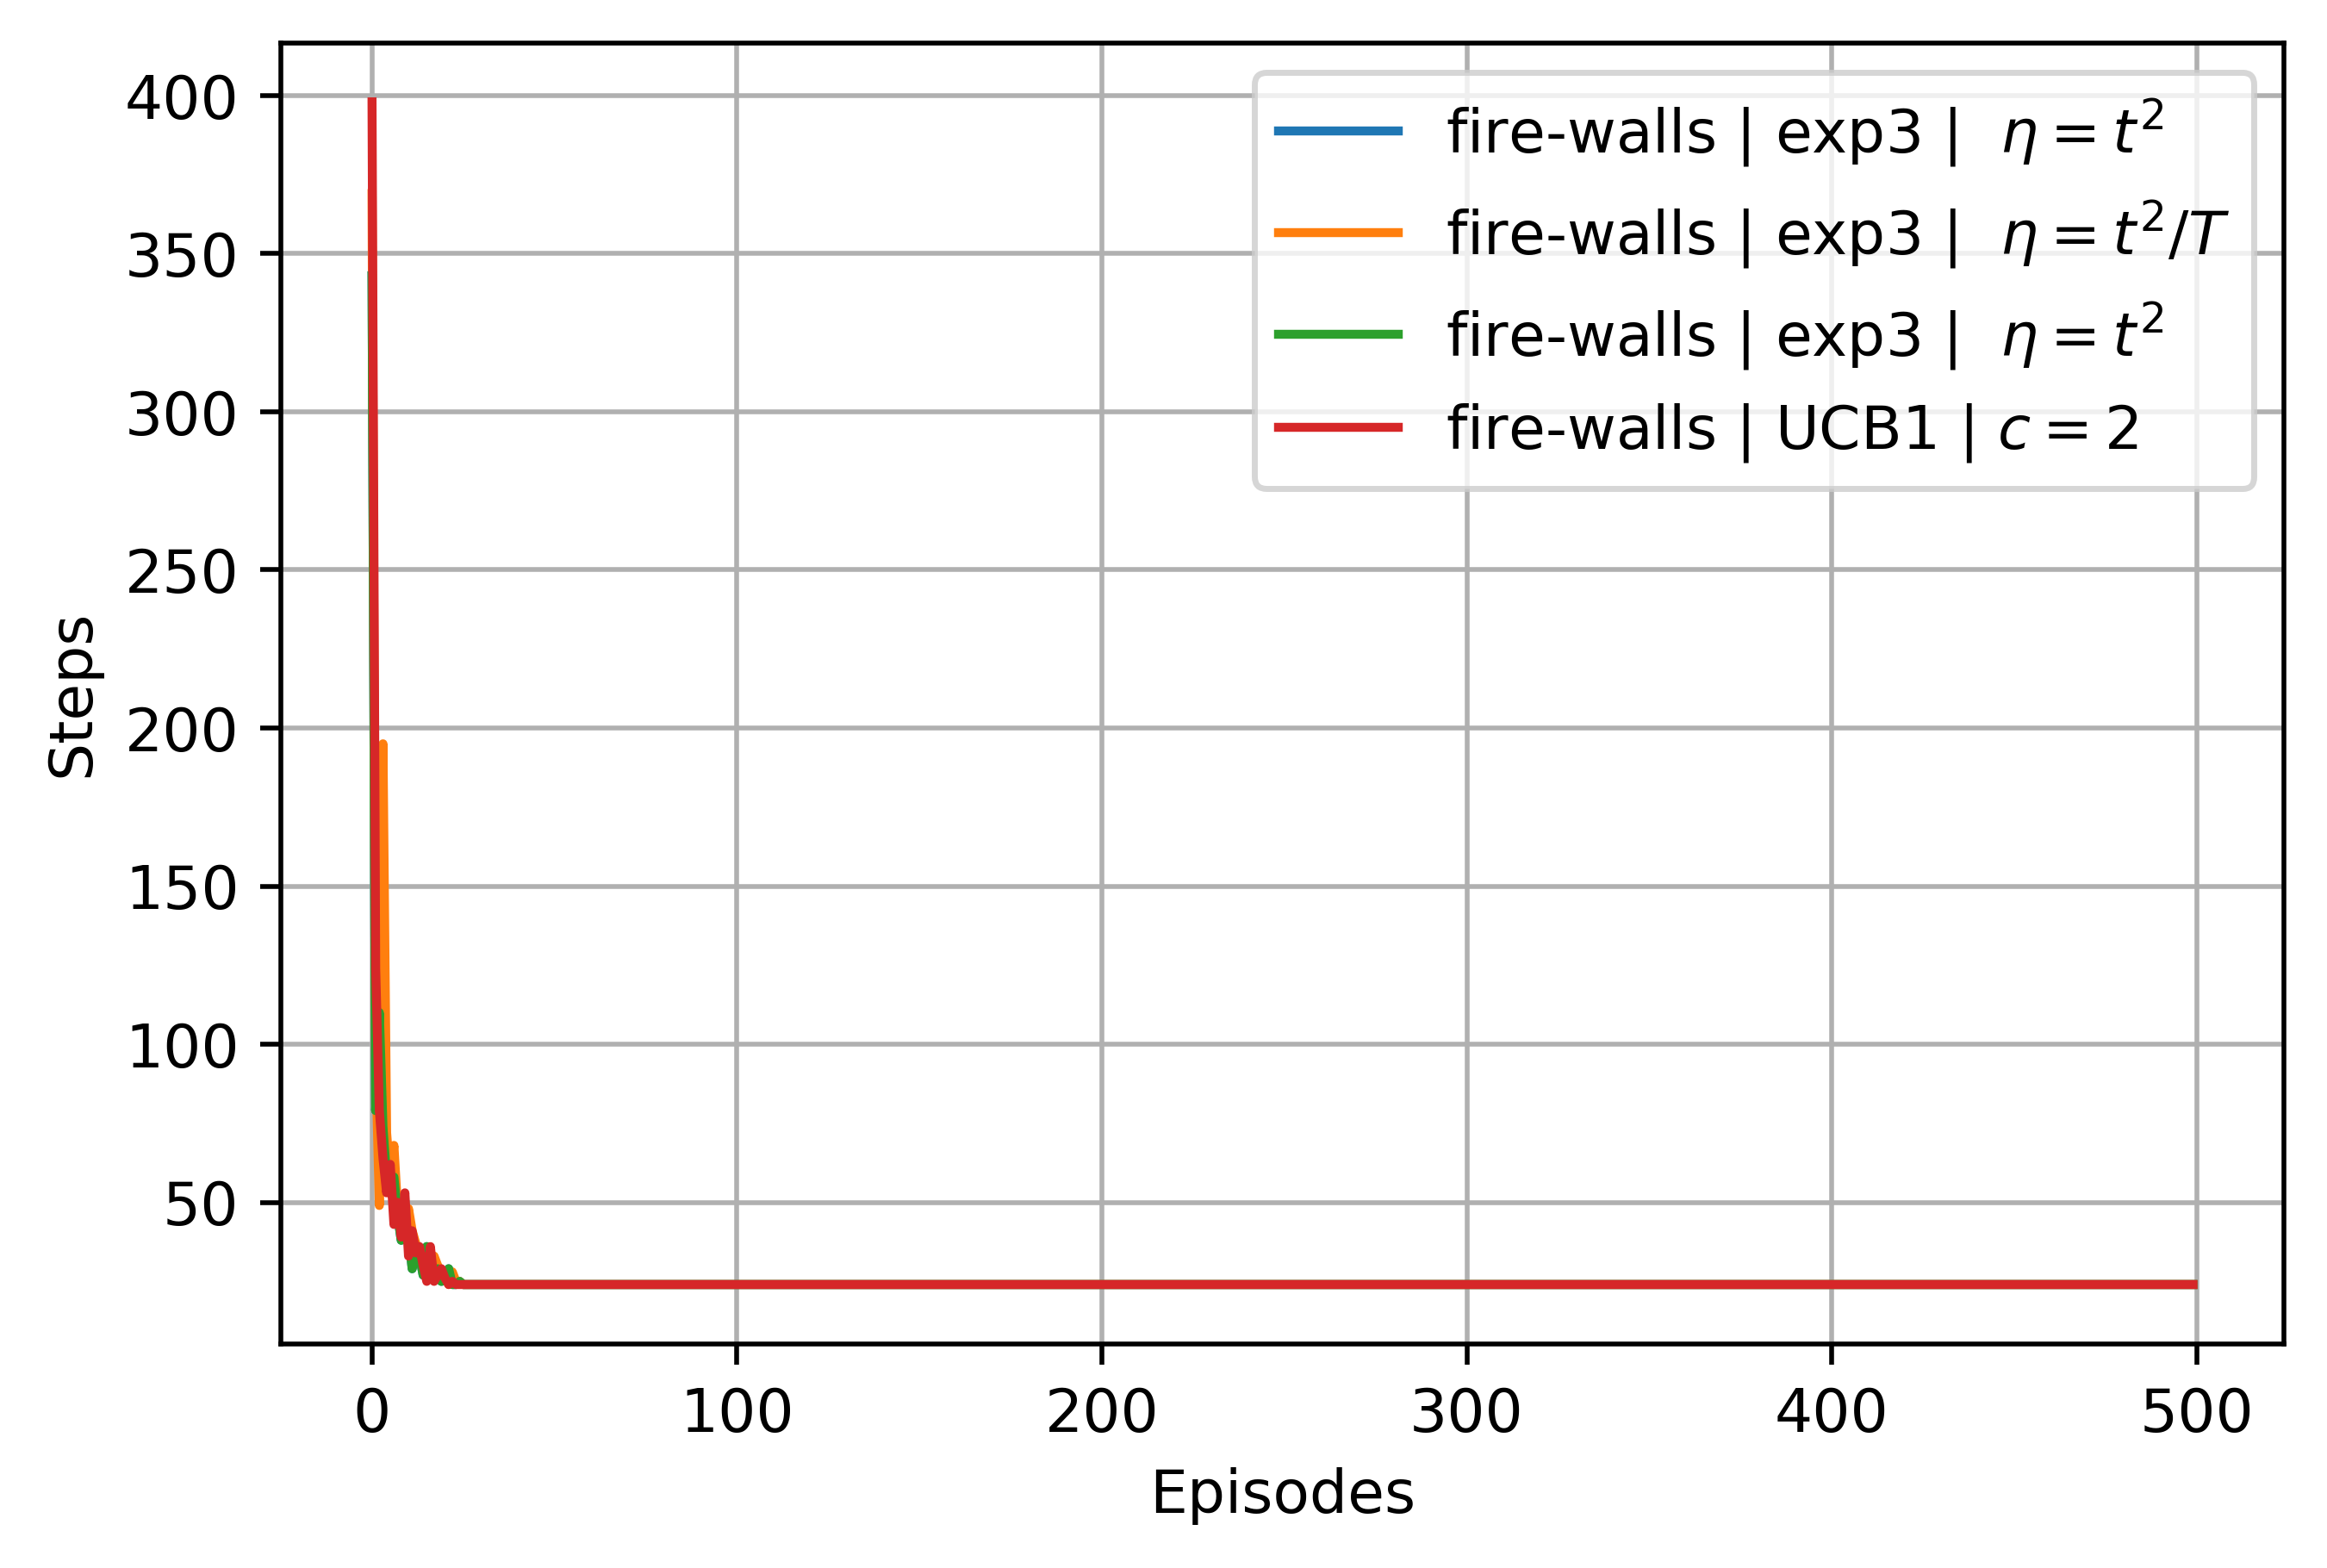

In [21]:
plot_steps_per_episode_comp([exp3_t2, exp3_t2_T, exp3_t2, ucb1], dpi=500)

In [63]:
exp3_t2_2 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2_2.train()
exp3_t2_3 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2_3.train()
exp3_t2_4 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2_4.train()
exp3_t2_5 = Q_maze(maze, episodes = n_iter, discount_rate = gamma, alpha = alpha, method = 'exp3', expression='t^2', game='fire-walls') 
exp3_t2_5.train()

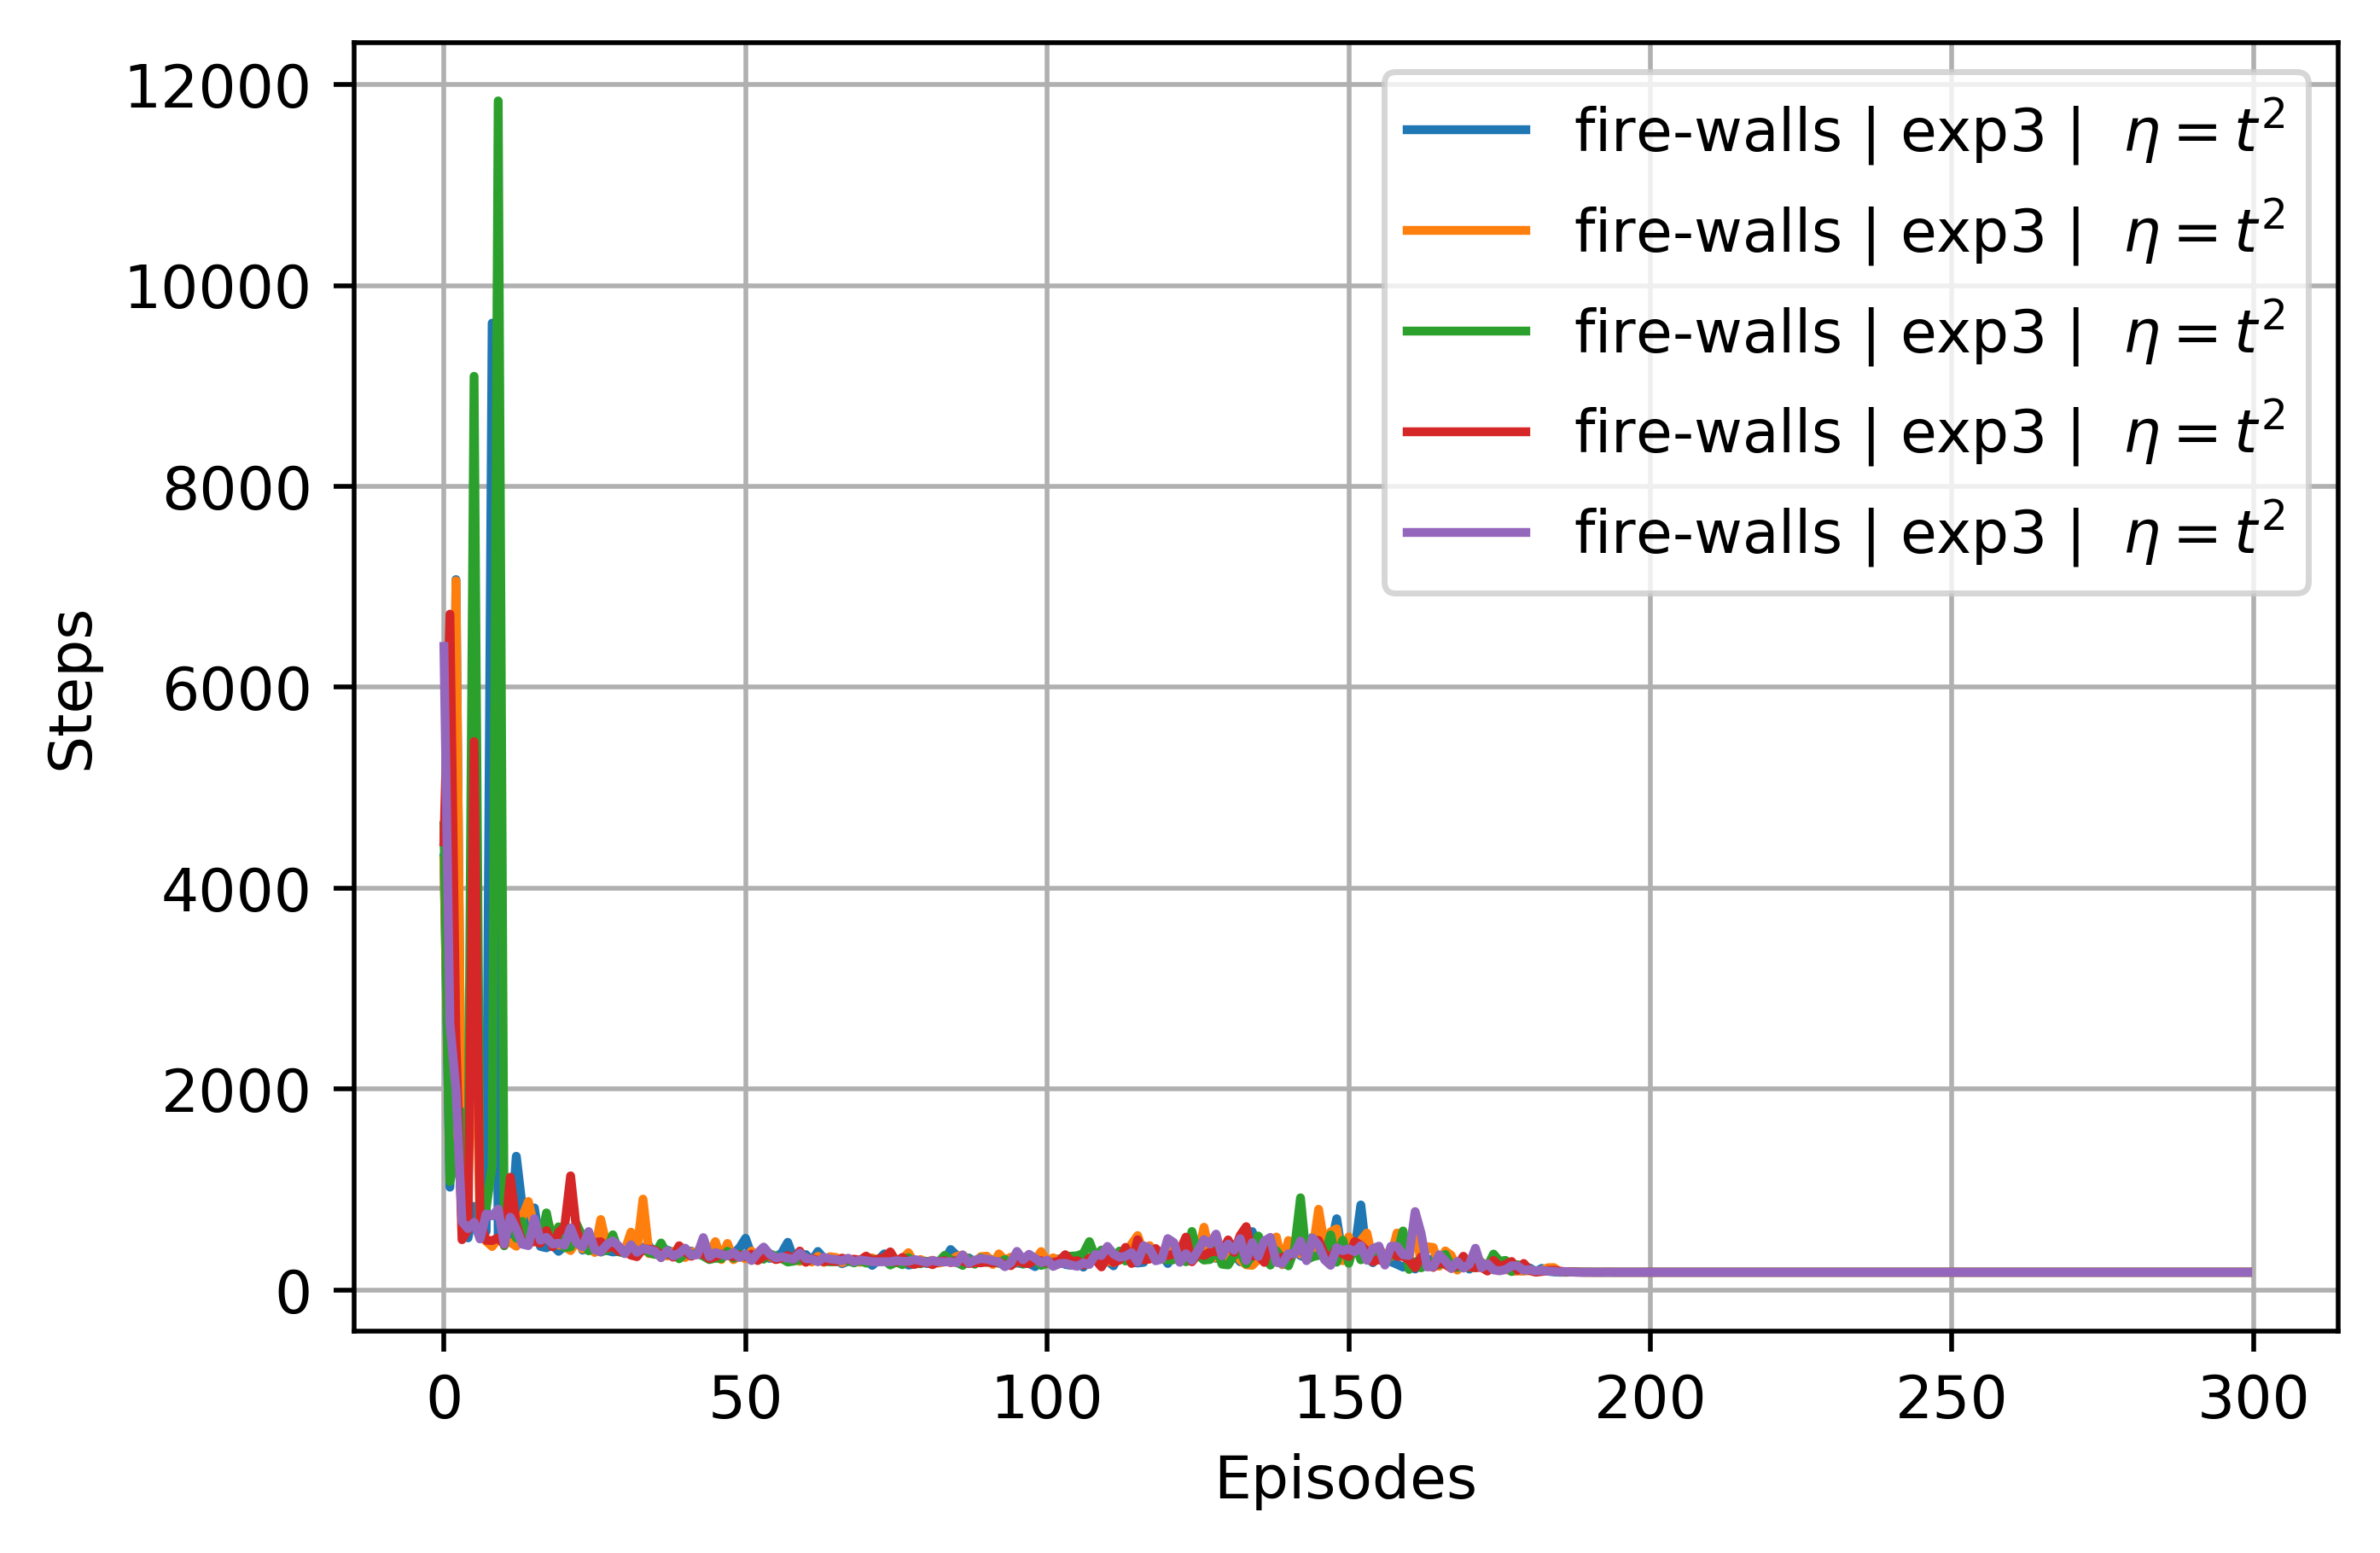

In [64]:
plot_steps_per_episode_comp([exp3_t2,exp3_t2_2,exp3_t2_3,exp3_t2_4,exp3_t2_5], dpi=500)

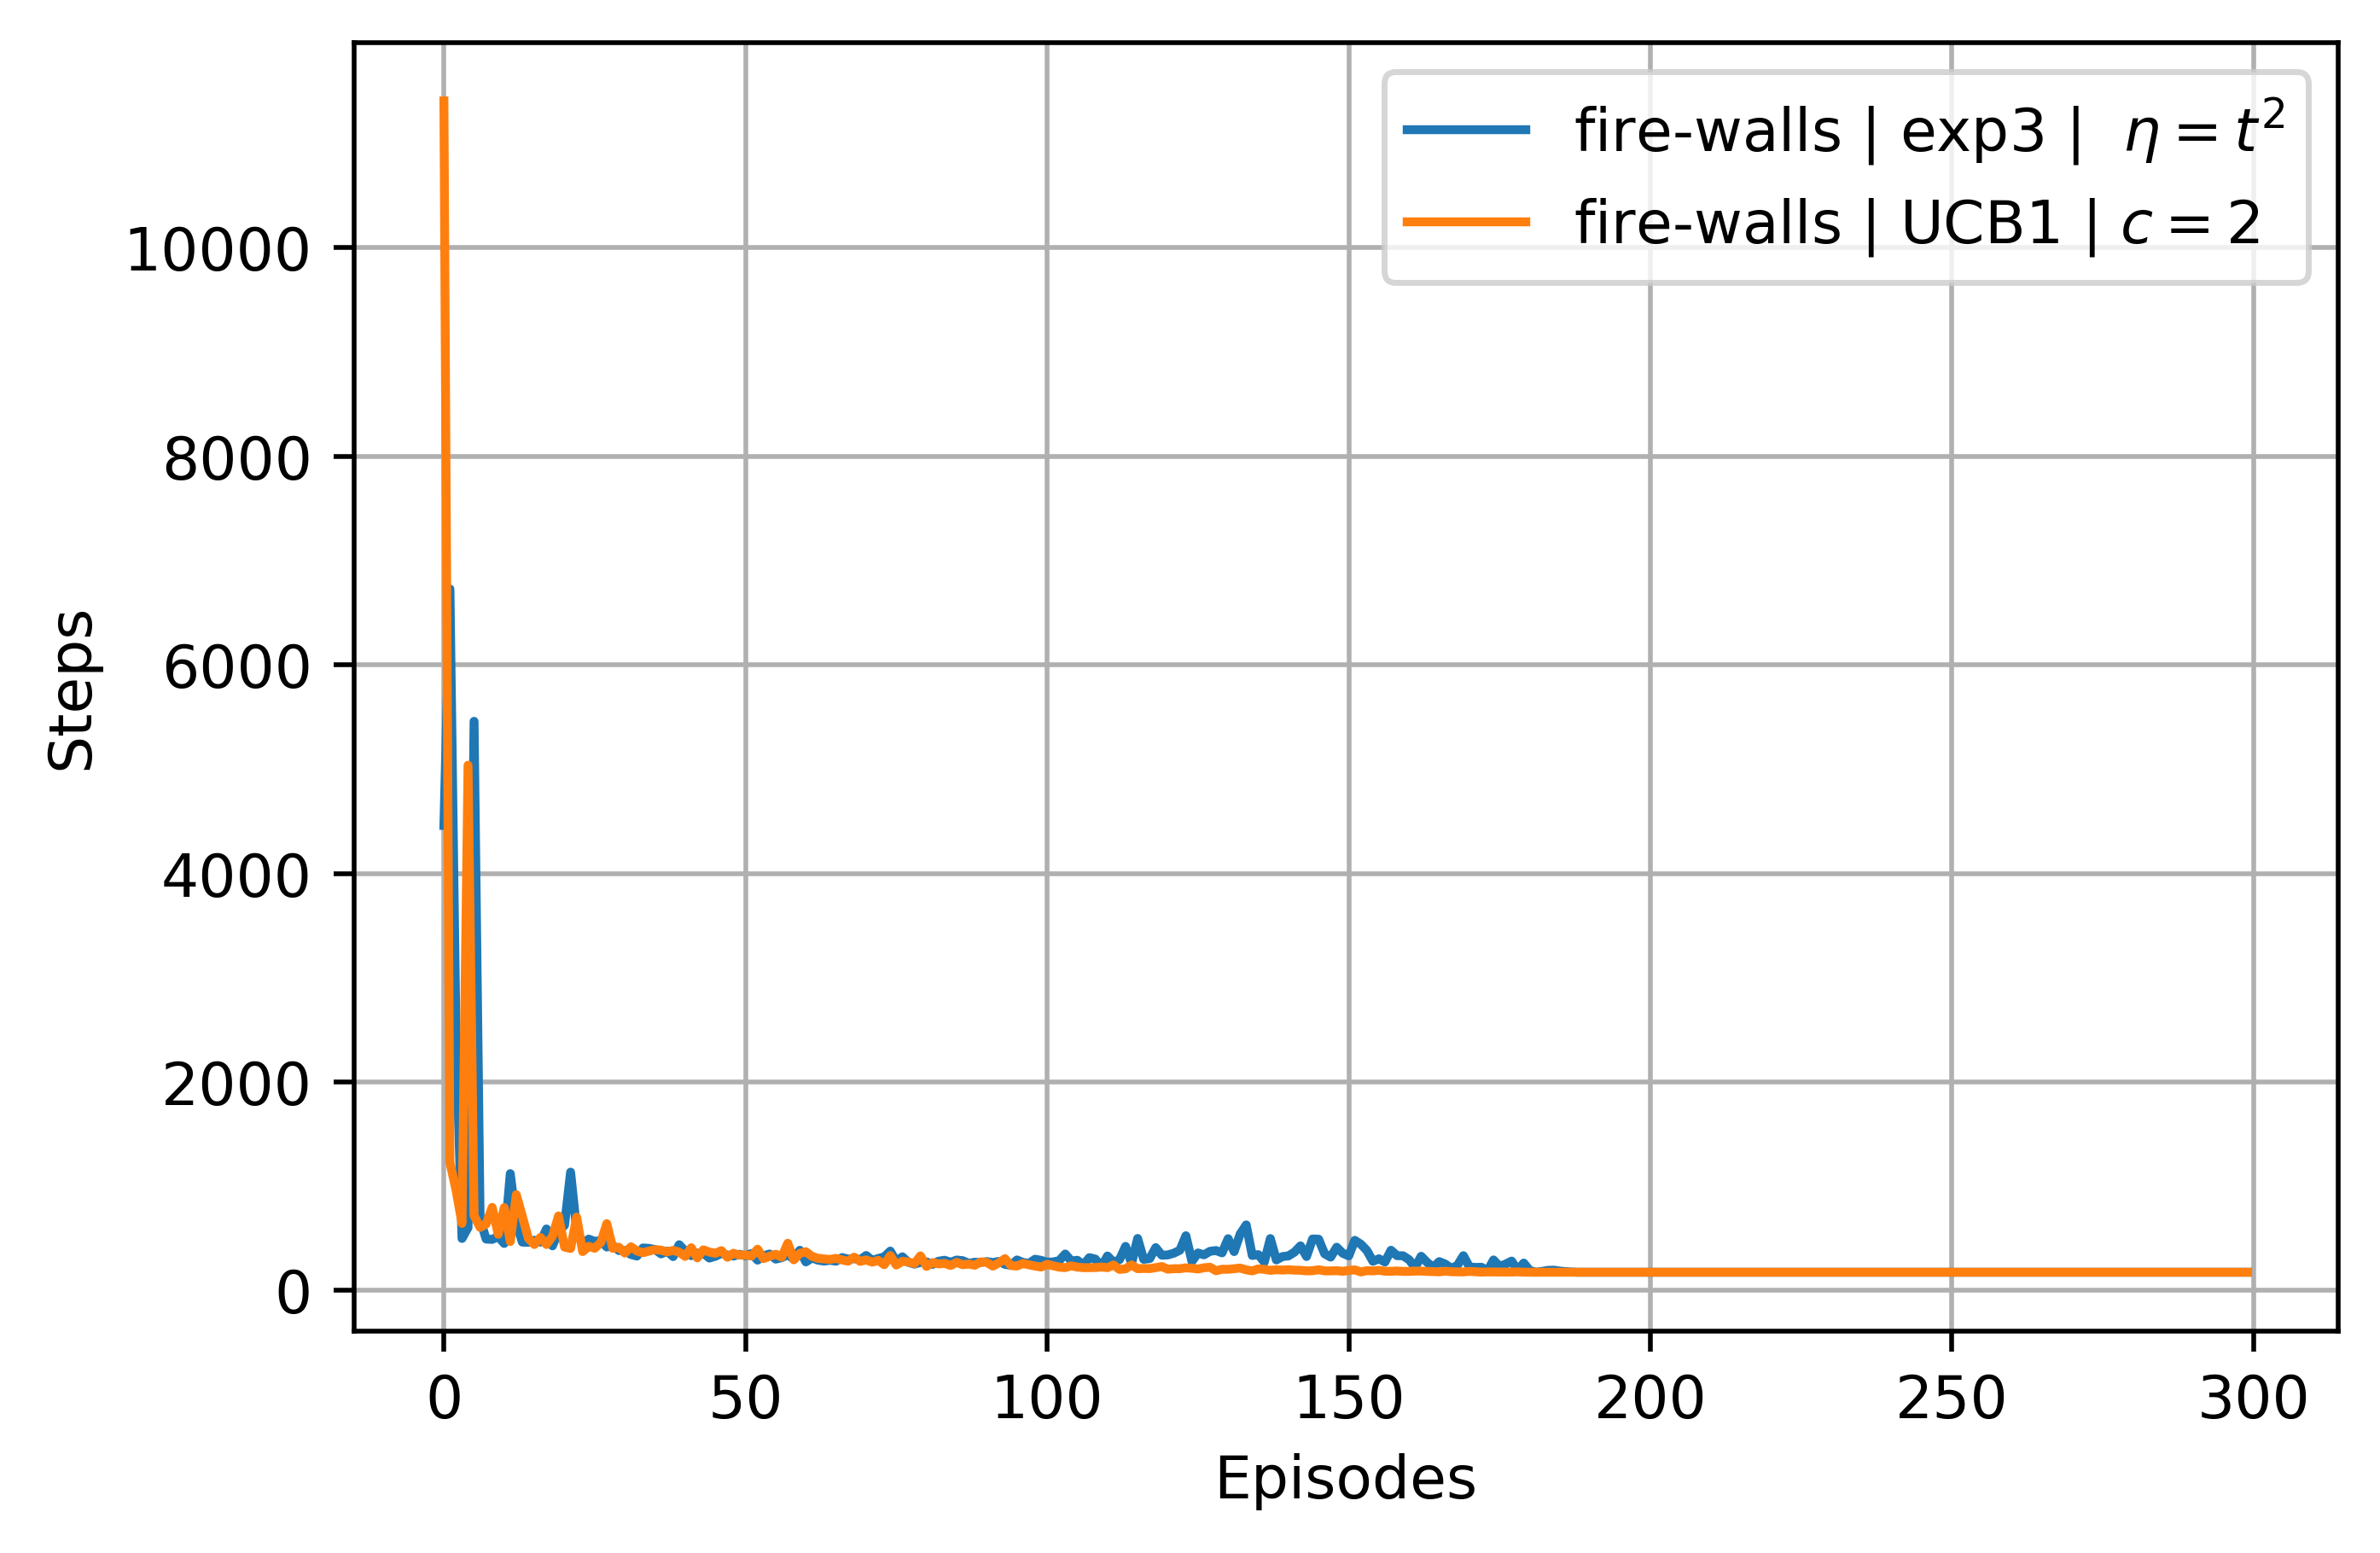

In [70]:
plot_steps_per_episode_comp([exp3_t2_4,ucb1], dpi=500)


### Uso de
```python
while(stack):
    stack.pop() #borrar el ultimo elemento
```

In [157]:
lista = [1,2,3,4,5]
while (lista):
    print(lista.pop())
    print(lista)

5
[1, 2, 3, 4]
4
[1, 2, 3]
3
[1, 2]
2
[1]
1
[]


In [159]:
set([1,2,3,4,5])

{1, 2, 3, 4, 5}

In [1]:
import numpy as np
from LearnRLib import Q_maze, plot_steps_per_episode_comp
from EnvsRLib import Maze, generate_maze

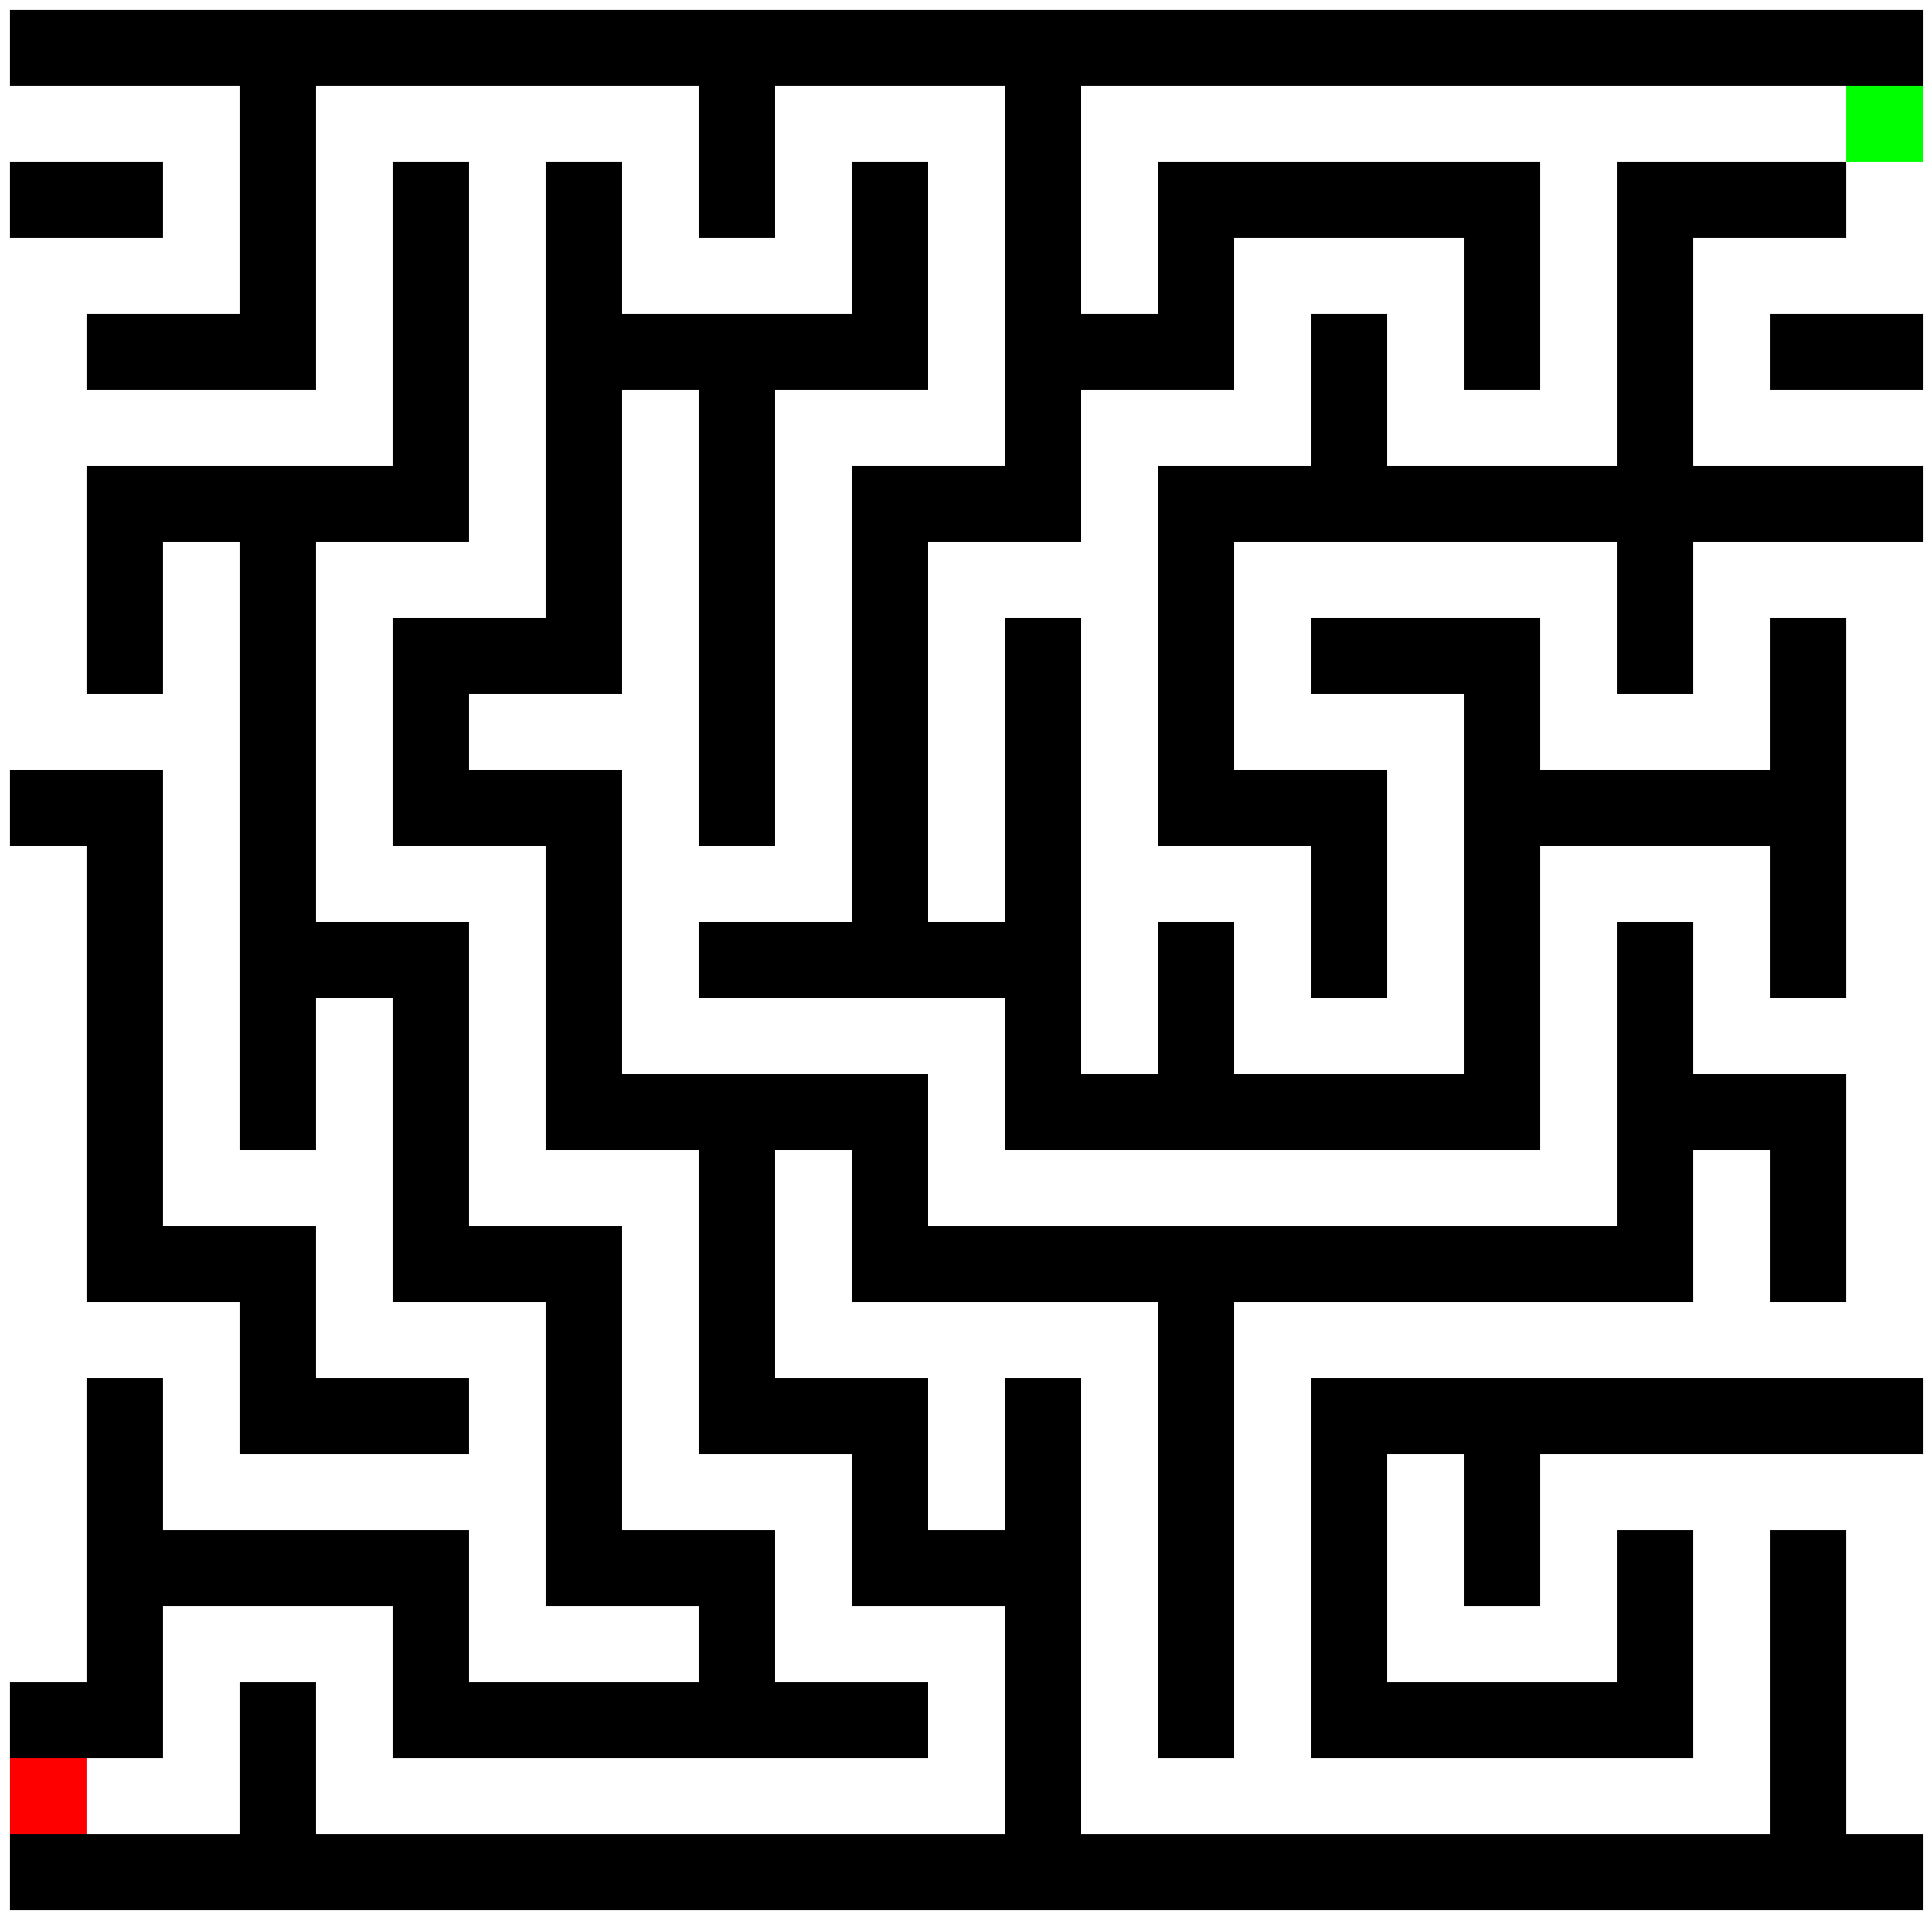

In [15]:
# Generación de laberinto
maze_size = 25
start_point = (1, 0)
end_point = (maze_size - 2, maze_size - 1)

rewards = generate_maze(maze_size, maze_size, start_point, end_point)
maze = Maze(rewards, start_point, end_point)
maze.render()

In [16]:
np.argwhere(maze.maze == 500)

array([[23, 24]], dtype=int64)

In [17]:
num_episodes = 200
alpha = 0.9
gamma = 0.9
epsilon = 0.1

In [26]:
model = Q_maze(maze, 'exp3', expression='\sqrt{t}', alpha=alpha, gamma=gamma)
model.train(num_episodes = num_episodes)


In [23]:
model1 = Q_maze(maze, 'exp3', expression='1/t', alpha=alpha, gamma=gamma)
model1.train(num_episodes = num_episodes)

In [20]:
model2 = Q_maze(maze, 'UCB1', alpha=alpha, gamma=gamma)
model2.train(num_episodes = num_episodes)

In [21]:
model3 = Q_maze(maze, 'e-greedy', epsilon=epsilon, alpha=alpha, gamma=gamma)
model3.train(num_episodes = num_episodes)

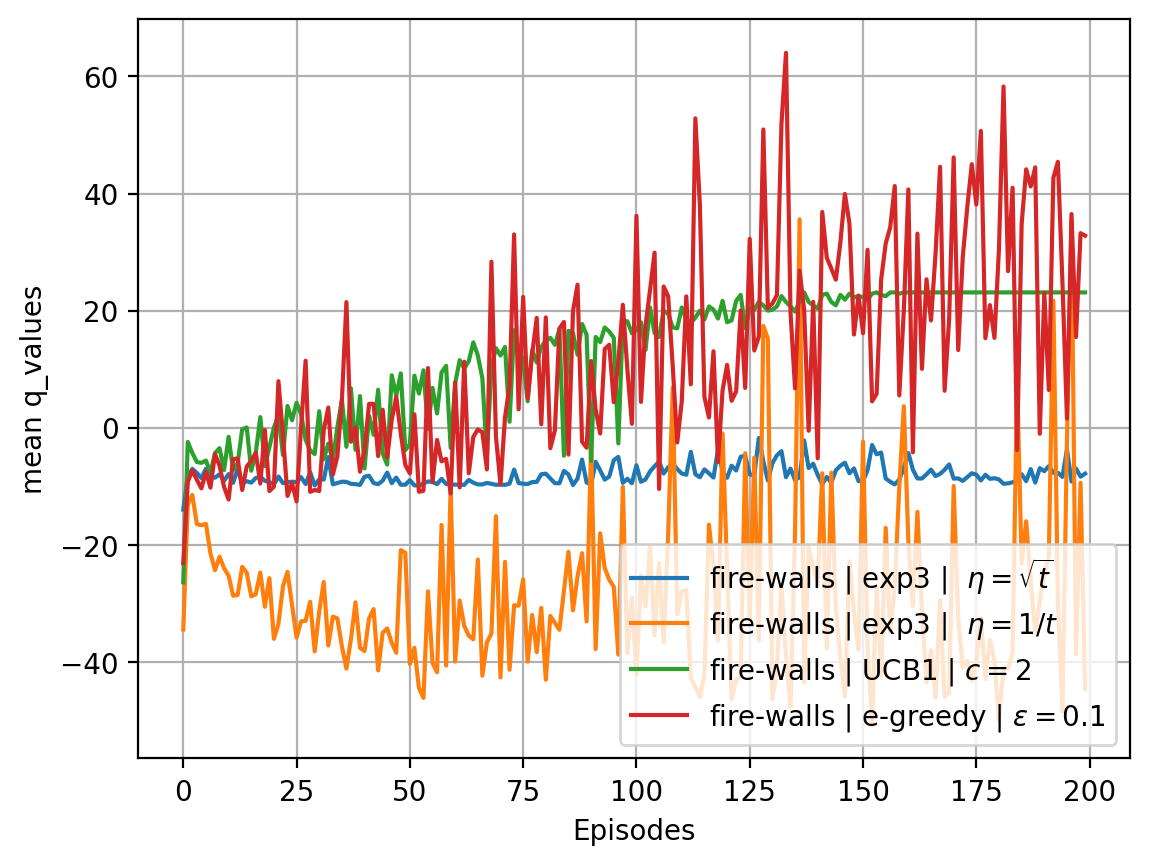

In [27]:
plot_steps_per_episode_comp([ model, model1, model2, model3], 'mean q_values', dpi=200)

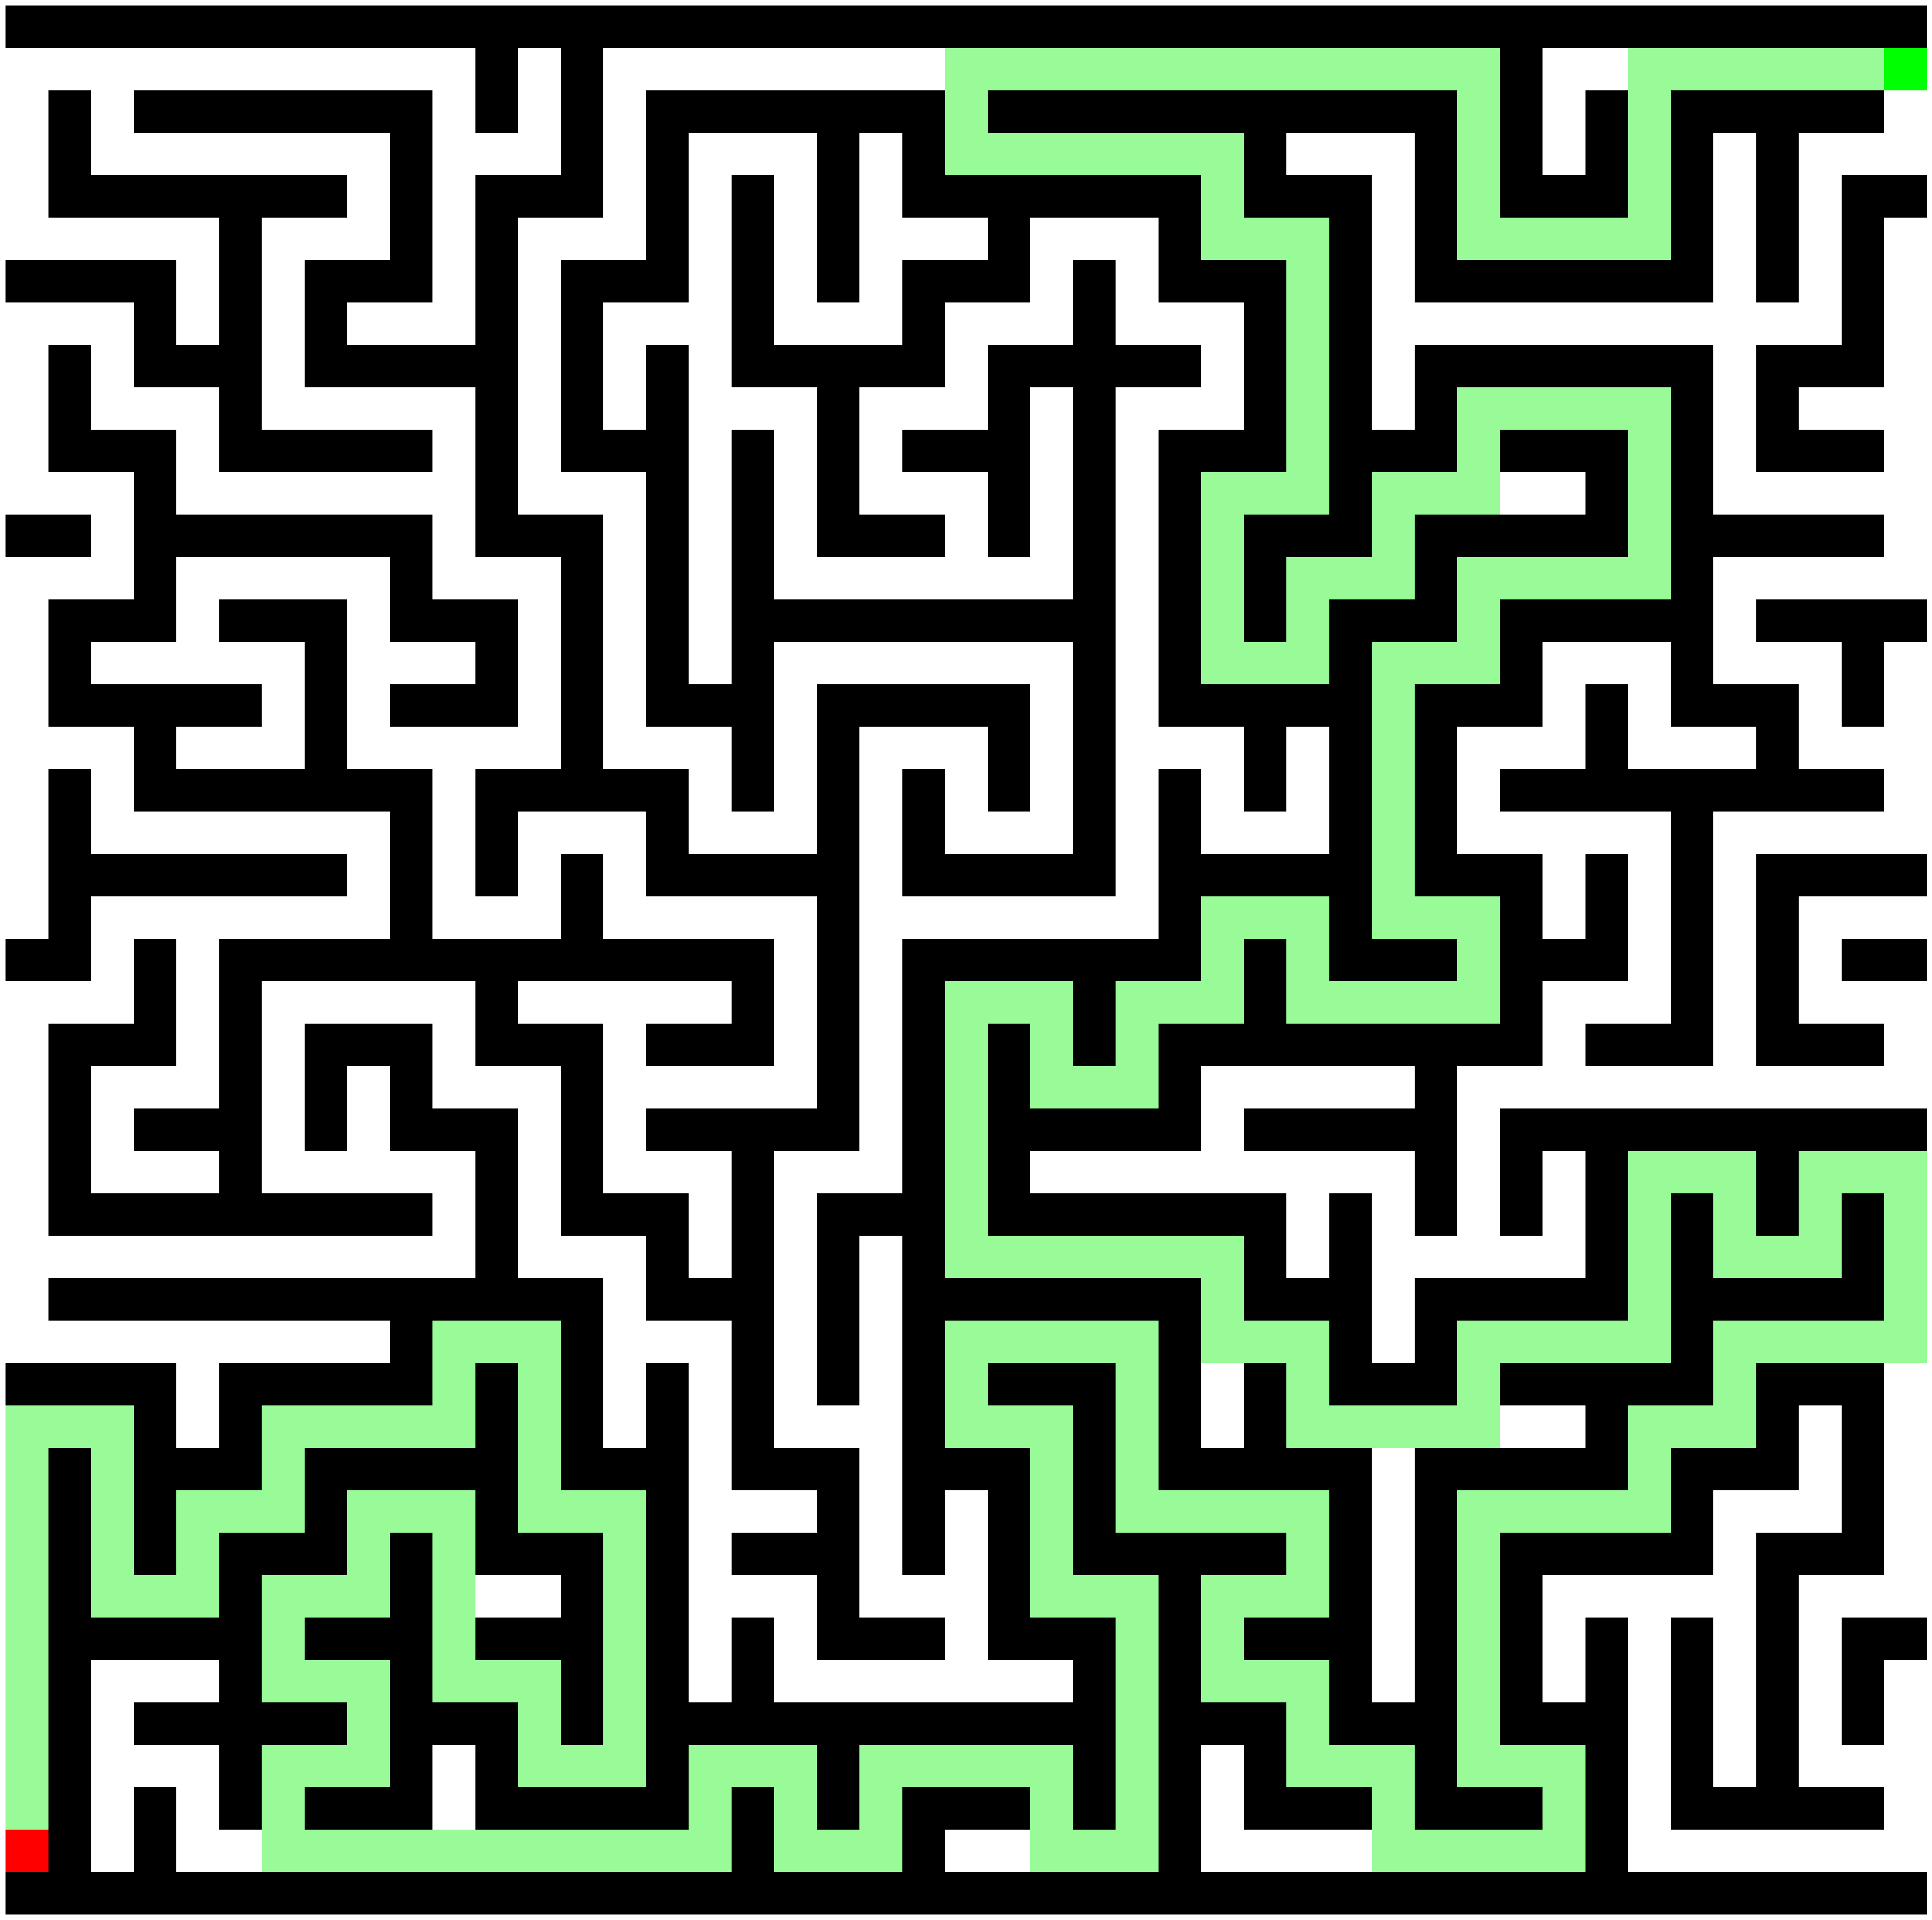

In [27]:
path = model.best_path(maze.start)
maze.render(path)

In [ ]:
class Stocks:
    def __init__(self, initial_portfolio, prices, max_shares):
        self.portfolio = initial_portfolio  # Cartera de acciones inicial
        self.prices = prices  # Precios de las acciones
        self.max_shares = max_shares  # Número máximo de acciones que se pueden comprar/vender/mantener
        self.num_shares = self.prices.shape[0] 
        self.num_actions = 3  # Comprar, vender o mantener
        self.num_states = (self.num_shares * self.prices) ** self.num_actions
        self.state_mapping = self.generate_state_mapping()
        
    def start_state(self):
        return self.index(self.start)
    
    def terminal_state(self, state, game):
        pass

    def take_action(self, state, action):
        pass
    
    def index(self, position):
        index = position[0] * self.states.shape[1] + position[1]
        return index

    def position(self, index):
        return divmod(index, self.states.shape[1])
    
    def get_reward(self, state, action, next_state):
        pass
    
    def render(self, path = []):
        pass

$N = \{N_1,N_2,N_3\}$ donde $N_i$: Cantidad de acciones en el portafolio de cada tipo i, con $i \in \{1,2,3\}$

$N_{max} = 10$:  Cantidad máxima que se puede tener de cada acción

$A: \text{ Comprar, vender, o mantener}$

$A_{max}$: cantidad máxima a comprar, vender, mantener

$S: \text{ Precio y cantidad de acciones disponibles de cada tipo de acción} = [p_1,p_2,p_3,N_1,N_2,N_3]$

$P: \text{ Precio de cada tipo de acción}$

$R: \text{Recompensas} = P \cdot N^T = [p_1,p_2,p_3] \cdot [N_1,N_2,N_3]^T$